In [1]:
metafile="J2145-0750_C.meta"

import ppalign as ppa
import numpy as np




In [2]:
outfile = "J2145-0750chnavgport.port"
ppa.align_archives(metafile=metafile, initial_guess="300_coherent_GWB/J2145-0750_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM",
                   tscrunch=True, pscrunch=True, SNR_cutoff=0.0, outfile=outfile, niter=1, quiet=False)

# Initial guess is an initial guess for an average portrait. I used the highest SNR profile for this.
# In this case, J1646-2142f64avgport.port is the average portrait created from the data files listed in the
# metafile. "f64" denotes that the files have been scrunched to have 64 frequency channels

# It is important to note that bad channels zeroed in the GMRT data processing pipeline must be fully zapped
# before being run through this notebook. I created a very simple shell script to do this and f scrunch to 
# a given number of frequency channels. I have only had total functionality with 64 channels. Input files also
# must be in FITS format. The shell script requires PSRCHIVE tools to work.




Initial guess: 300_coherent_GWB/J2145-0750_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM.

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.053
        DM [cm**-3 pc]     = 9.002400
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity

Doing iteration 1...
FITS file name: 300_coherent_GWB/J2145-0750_500_200_512_2.29oct2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS_freq_coord_DM.

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.29oct2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.055
        DM [cm**-3 pc]     = 9.002400
        center freq. [MHz] = 399.8

In [3]:
import ppspline as pps
avgport = outfile
dp = pps.DataPortrait(avgport)
dp.normalize_portrait("prof")

# This initializes the portrait be modeled by the spline model later. It is normalized 
# by the average portrait created earlier, so as to clearly model any frequency-dependent
# profile evolution.



Reading data from J2145-0750chnavgport.port on source PSR_2145-0750...
	P [ms]             = 16.053
        DM [cm**-3 pc]     = 0.000000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity



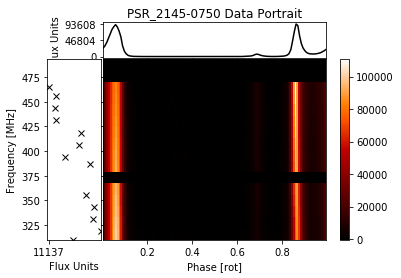

In [4]:
dp.show_data_portrait()

In [6]:
# Mainly set to defaults. SNR cutoffs removed
smooth = True
rchi2_tol = 0.1 #What is this factor
k = 5
sfac = 1.0
max_nbreak = 2

# Setting default arguments for the make_spline_model() seen below. It is important to set
# max_nbreak = None. Otherwise, the spline model will have many breakpoints and not accurately
# model the profile evolution.
dp.make_spline_model(smooth=smooth, rchi2_tol=rchi2_tol, k=k, sfac=sfac,
                    max_nbreak=max_nbreak, model_name=None, quiet=False, snr_cutoff=45)
# Creation of spline model. snr_cutoff is default to 150 but tweaking may be needed to
# get 1 - 2 "significant" eigenprofiles. Somewhat arbitrary.


Performing principal component analysis on data with 128 dimensions and 13 measurements...
B-spline interpolation model J2145-0750chnavgport.port.spl uses 2 basis profile components and 2 breakpoints (6 B-splines with k=5).


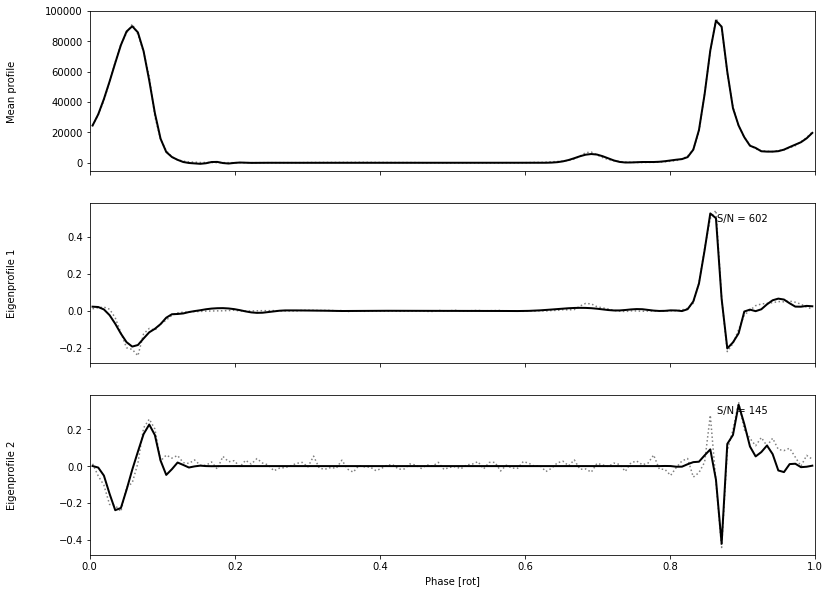

In [7]:
dp.show_eigenprofiles(show_snrs=True)
# Showing average profile and eigenprofile(s)


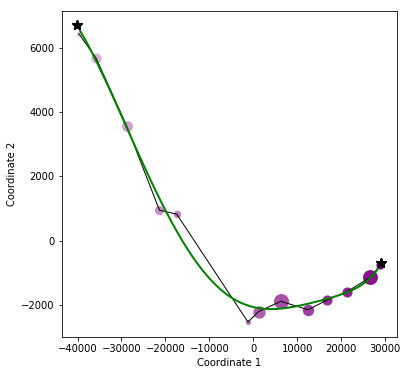

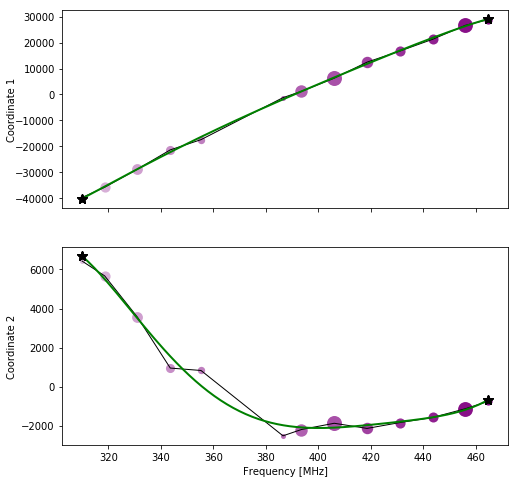

In [8]:
dp.show_spline_curve_projections()
# Shows a projection of how the eigenprofile(s) changes according to frequency and to each other.


In [9]:
J2145_fit_modelfile = "J2145-0750_splinefit.spl"
dp.write_model(J2145_fit_modelfile, quiet=False)

# Writes spline model to a file.


Wrote modelfile J2145-0750_splinefit.spl.



Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.29oct2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.055
        DM [cm**-3 pc]     = 9.002400
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.29oct2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS_freq_coord_DM
~0.0123 sec/TOA
Med. TOA error is 1.012 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.29oct2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.055
        DM [cm**-3 pc]     = 9.002400
       

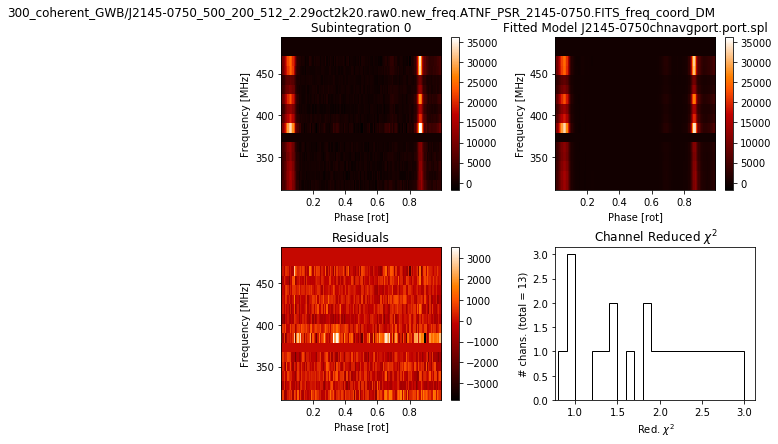


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.15nov2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.053
        DM [cm**-3 pc]     = 9.002400
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.15nov2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS_freq_coord_DM
~0.0213 sec/TOA
Med. TOA error is 0.298 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.15nov2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.053
        DM [cm**-3 pc]     = 9.002400
       

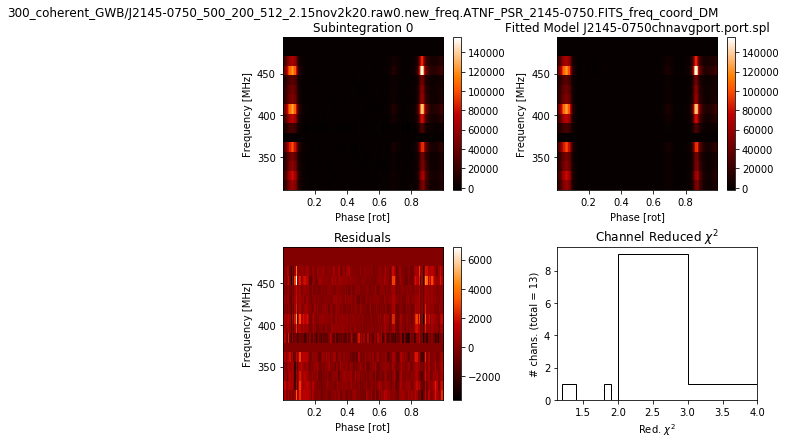


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.28nov2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.054
        DM [cm**-3 pc]     = 9.002400
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1198.82 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.28nov2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS_freq_coord_DM
~0.0265 sec/TOA
Med. TOA error is 0.334 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.28nov2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.054
        DM [cm**-3 pc]     = 9.002400
       

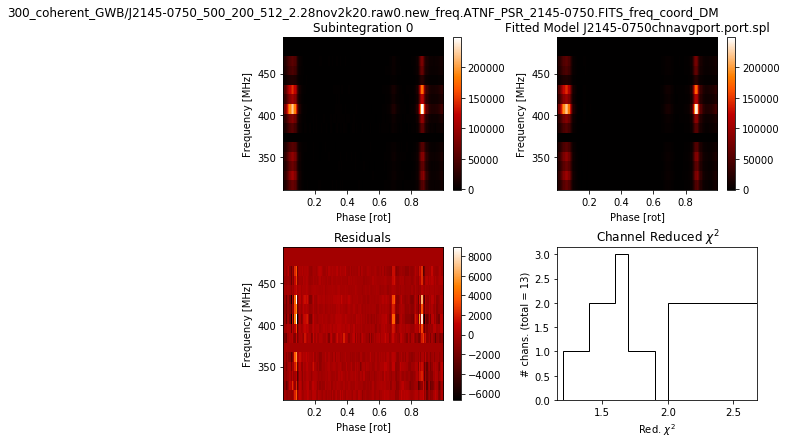


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.28dec2k20.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 pc]     = 9.002400
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.28dec2k20.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM
~0.0092 sec/TOA
Med. TOA error is 0.361 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.28dec2k20.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 pc]     = 9.002400
        ce

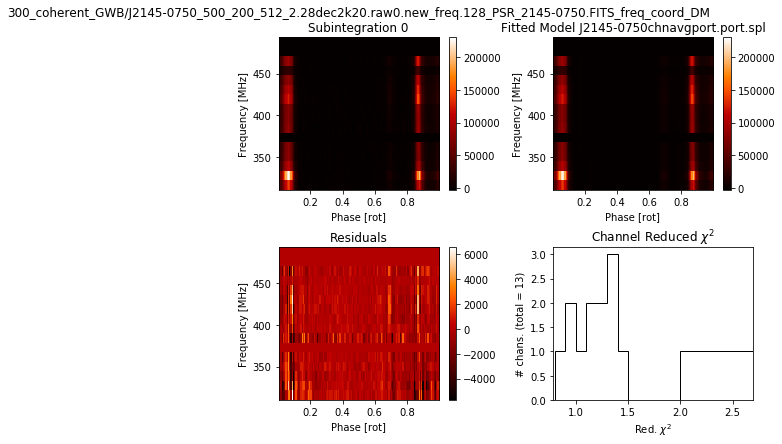


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.1feb2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 pc]     = 9.002400
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.1feb2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM
~0.0124 sec/TOA
Med. TOA error is 0.358 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.1feb2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 pc]     = 9.002400
        cente

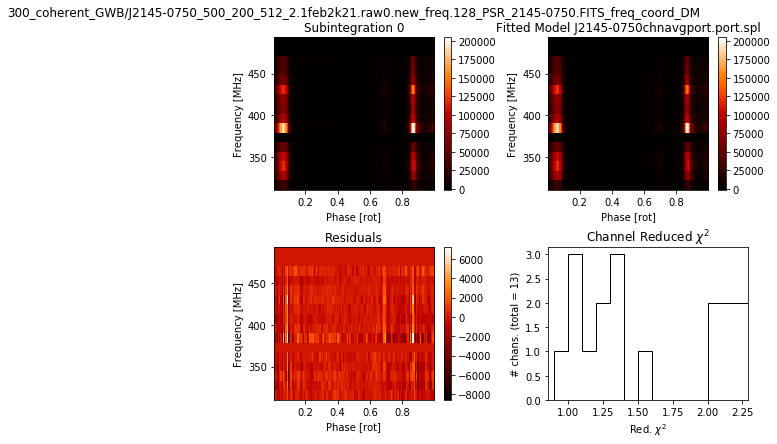


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.13mar2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.050
        DM [cm**-3 pc]     = 9.002400
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.13mar2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM
~0.0202 sec/TOA
Med. TOA error is 0.333 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.13mar2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.050
        DM [cm**-3 pc]     = 9.002400
        ce

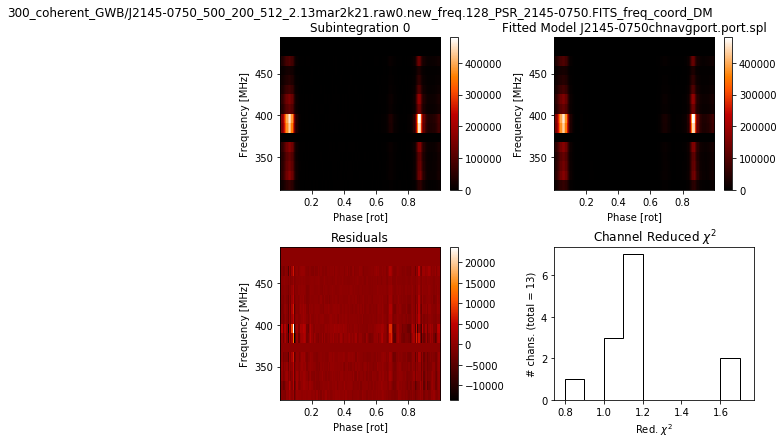


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.11may2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 pc]     = 9.002400
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.11may2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM
~0.0260 sec/TOA
Med. TOA error is 0.343 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.11may2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 pc]     = 9.002400
        ce

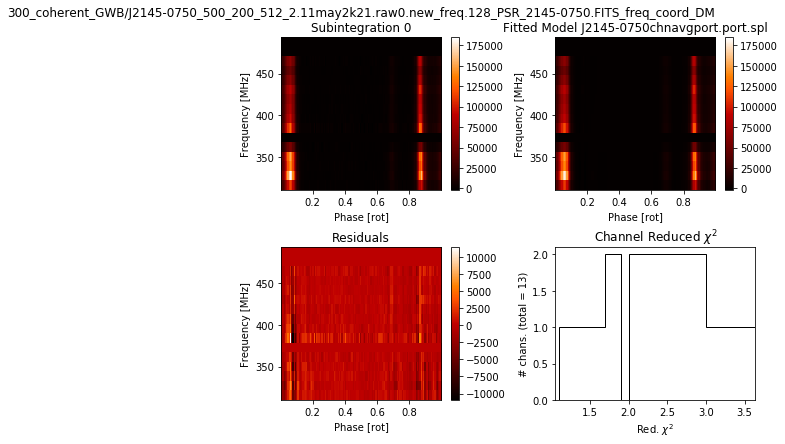


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.053
        DM [cm**-3 pc]     = 9.002400
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM
~0.0161 sec/TOA
Med. TOA error is 0.372 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.053
        DM [cm**-3 pc]     = 9.002400
        ce

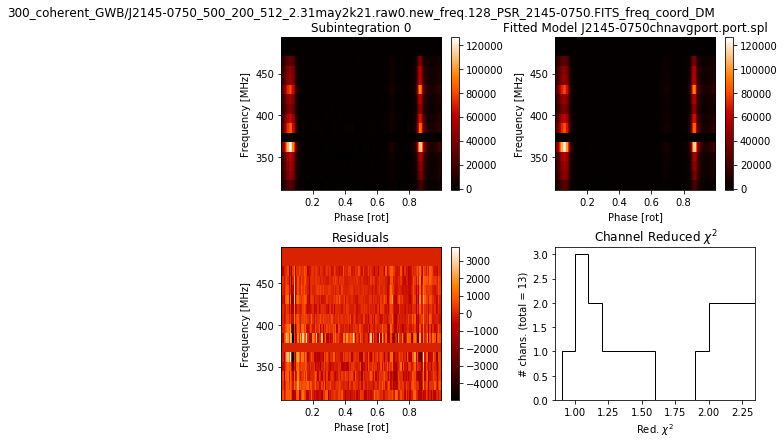


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.28jun2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 pc]     = 9.002400
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1797.49 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.28jun2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM
~0.0124 sec/TOA
Med. TOA error is 0.312 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.28jun2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 pc]     = 9.002400
        ce

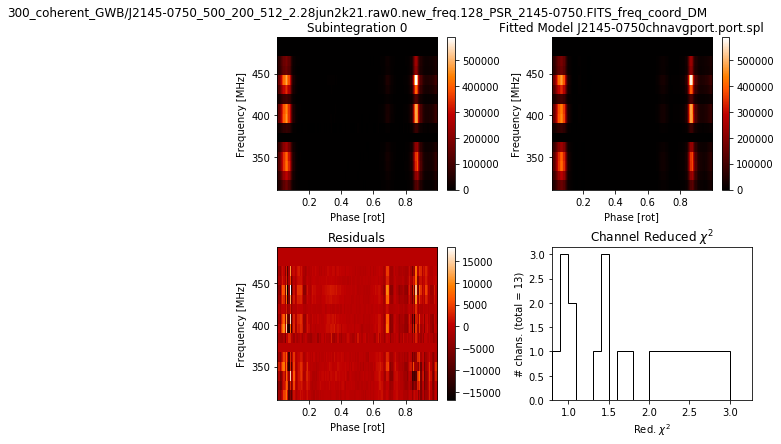


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.3aug2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.051
        DM [cm**-3 pc]     = 9.002400
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.3aug2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM
~0.0145 sec/TOA
Med. TOA error is 0.306 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.3aug2k21.raw0.new_freq.128_PSR_2145-0750.FITS_freq_coord_DM on source PSR_2145-0750...
	P [ms]             = 16.051
        DM [cm**-3 pc]     = 9.002400
        cente

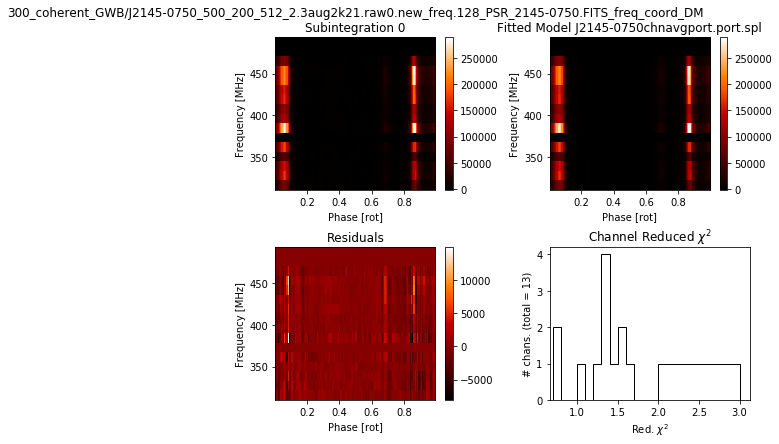

--------------------------
Total time: 0.36 sec, ~0.0358 sec/TOA


In [10]:
import pptoas as ppt
from pplib import write_TOAs
toaprogmeta = "J2145-0750_C.meta"
gt = ppt.GetTOAs(toaprogmeta, J2145_fit_modelfile)
gt.get_TOAs(bary=True,show_plot=True)
#gt.get_narrowband_TOAs()


In [11]:
# TOAs produced. Can see number of TOAs produced per epoch as well as median TOA error for
# each epoch.
#gt.show_fit(datafile=None, isub=0)  # datafile=None will just select the first datafile from the metafile
timfile = "24Dec2k21_WB_C_J2145-0750_2eigenvector.tim"
#timfile = "24Dec2k21_NB_C_J2145-0750.tim"
write_TOAs(gt.TOA_list, SNR_cutoff=0.0, outfile=timfile, append=False)

# Writing of TOAs to tim file. Writes in TEMPO format. Can copy paste "freq MJD uncert"
# information into another tim file.

In [12]:
fil = open('24Dec2k21_WB_C_J2145-0750_2eigenvector.tim', 'r')
for line in fil:
    print line#.split()[2], line.split()[3], line.split()[4], line.split()[5], line.split()[6], line.split()[7], line.split()[8]

300_coherent_GWB/J2145-0750_500_200_512_2.29oct2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS_freq_coord_DM 406.40392934 59151.637313974119118   1.012  gmrt -pp_dm 9.0014726 -pp_dme 0.0001622 -be  -nchx 13 -tobs 1798.963 -f _ -gof 1.281 -snr 397.109 -fratio 1.499 -subint 0 -nch 16 -bw 154.687 -chbw 12.500 -fe  -nbin 128 -tmplt J2145-0750_splinefit.spl

300_coherent_GWB/J2145-0750_500_200_512_2.15nov2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS_freq_coord_DM 388.30432936 59168.568013977991577   0.298  gmrt -pp_dm 9.0023742 -pp_dme 0.0000393 -be  -nchx 13 -tobs 1798.963 -f _ -gof 1.899 -snr 1406.735 -fratio 1.499 -subint 0 -nch 16 -bw 154.687 -chbw 12.500 -fe  -nbin 128 -tmplt J2145-0750_splinefit.spl

300_coherent_GWB/J2145-0750_500_200_512_2.28nov2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS_freq_coord_DM 381.41887510 59181.526132313531955   0.334  gmrt -pp_dm 9.0019039 -pp_dme 0.0000422 -be  -nchx 13 -tobs 1198.817 -f _ -gof 1.623 -snr 1231.796 -fratio 1.499 -subint 0 -nch 16 -bw 154.687 -chbw 